In [ ]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
os.chdir("/content/sample_data")

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')
combined_csv.to_csv
df = pd.read_csv("combined_csv.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4663 entries, 0 to 4662
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           4663 non-null   object 
 1   Source                         4663 non-null   object 
 2   Site ID                        4663 non-null   int64  
 3   POC                            4663 non-null   int64  
 4   Daily Mean PM10 Concentration  4663 non-null   int64  
 5   UNITS                          4663 non-null   object 
 6   DAILY_AQI_VALUE                4663 non-null   int64  
 7   Site Name                      4663 non-null   object 
 8   DAILY_OBS_COUNT                4663 non-null   int64  
 9   PERCENT_COMPLETE               4663 non-null   float64
 10  AQS_PARAMETER_CODE             4663 non-null   int64  
 11  AQS_PARAMETER_DESC             4663 non-null   object 
 12  CBSA_CODE                      4308 non-null   f

In [ ]:
df.shape

(4663, 20)

In [ ]:
df.columns

Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Mean PM10 Concentration',
       'UNITS', 'DAILY_AQI_VALUE', 'Site Name', 'DAILY_OBS_COUNT',
       'PERCENT_COMPLETE', 'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC',
       'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE', 'STATE', 'COUNTY_CODE',
       'COUNTY', 'SITE_LATITUDE', 'SITE_LONGITUDE'],
      dtype='object')

In [ ]:
df.isnull().sum()

Date                               0
Source                             0
Site ID                            0
POC                                0
Daily Mean PM10 Concentration      0
UNITS                              0
DAILY_AQI_VALUE                    0
Site Name                          0
DAILY_OBS_COUNT                    0
PERCENT_COMPLETE                   0
AQS_PARAMETER_CODE                 0
AQS_PARAMETER_DESC                 0
CBSA_CODE                        355
CBSA_NAME                        355
STATE_CODE                         0
STATE                              0
COUNTY_CODE                        0
COUNTY                             0
SITE_LATITUDE                      0
SITE_LONGITUDE                     0
dtype: int64

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4658    False
4659    False
4660    False
4661    False
4662    False
Length: 4663, dtype: bool

In [ ]:
print(df.isnull().sum())

Date                               0
Source                             0
Site ID                            0
POC                                0
Daily Mean PM10 Concentration      0
UNITS                              0
DAILY_AQI_VALUE                    0
Site Name                          0
DAILY_OBS_COUNT                    0
PERCENT_COMPLETE                   0
AQS_PARAMETER_CODE                 0
AQS_PARAMETER_DESC                 0
CBSA_CODE                        355
CBSA_NAME                        355
STATE_CODE                         0
STATE                              0
COUNTY_CODE                        0
COUNTY                             0
SITE_LATITUDE                      0
SITE_LONGITUDE                     0
dtype: int64


In [ ]:
df = df.dropna() 
df.count()

Date                             4308
Source                           4308
Site ID                          4308
POC                              4308
Daily Mean PM10 Concentration    4308
UNITS                            4308
DAILY_AQI_VALUE                  4308
Site Name                        4308
DAILY_OBS_COUNT                  4308
PERCENT_COMPLETE                 4308
AQS_PARAMETER_CODE               4308
AQS_PARAMETER_DESC               4308
CBSA_CODE                        4308
CBSA_NAME                        4308
STATE_CODE                       4308
STATE                            4308
COUNTY_CODE                      4308
COUNTY                           4308
SITE_LATITUDE                    4308
SITE_LONGITUDE                   4308
dtype: int64

In [ ]:
print(df.isnull().sum())

Date                             0
Source                           0
Site ID                          0
POC                              0
Daily Mean PM10 Concentration    0
UNITS                            0
DAILY_AQI_VALUE                  0
Site Name                        0
DAILY_OBS_COUNT                  0
PERCENT_COMPLETE                 0
AQS_PARAMETER_CODE               0
AQS_PARAMETER_DESC               0
CBSA_CODE                        0
CBSA_NAME                        0
STATE_CODE                       0
STATE                            0
COUNTY_CODE                      0
COUNTY                           0
SITE_LATITUDE                    0
SITE_LONGITUDE                   0
dtype: int64


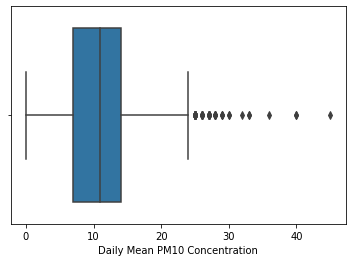

In [ ]:
sns.boxplot(x=df['Daily Mean PM10 Concentration'])

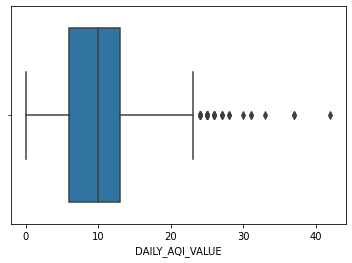

In [ ]:
sns.boxplot(x=df['DAILY_AQI_VALUE'])

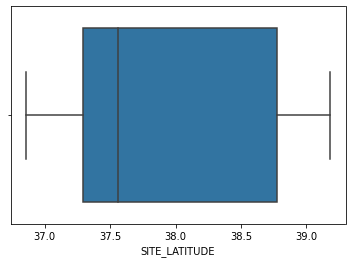

In [ ]:
sns.boxplot(x=df['SITE_LATITUDE'])

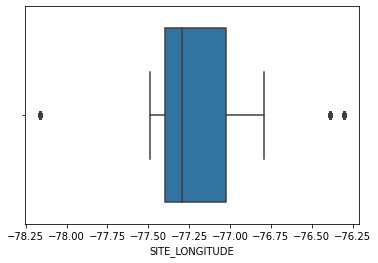

In [ ]:
sns.boxplot(x=df['SITE_LONGITUDE'])

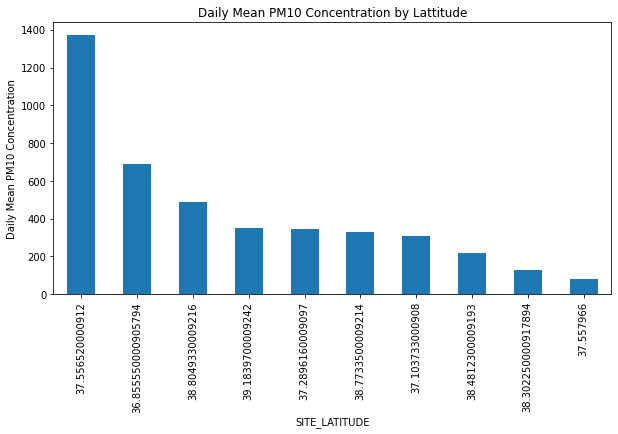

In [ ]:
# Plotting a Histogram
df.SITE_LATITUDE.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Daily Mean PM10 Concentration by Lattitude')
plt.ylabel('Daily Mean PM10 Concentration')
plt.xlabel('SITE_LATITUDE');

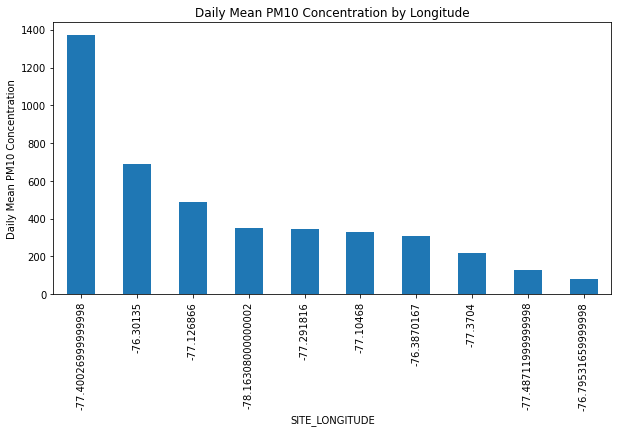

In [ ]:
# Plotting a Histogram
df.SITE_LONGITUDE.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Daily Mean PM10 Concentration by Longitude')
plt.ylabel('Daily Mean PM10 Concentration')
plt.xlabel('SITE_LONGITUDE');

**Analyzing**

In [ ]:
corr = df.corr

,Site ID,POC,Daily Mean PM10 Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
Site ID,1.000000,-0.410736,-0.045206,-0.047226,NaN,NaN,NaN,0.574551,NaN,1.000000,-0.052298,0.246555
POC,-0.410736,1.000000,0.064146,0.064757,NaN,NaN,NaN,-0.512009,NaN,-0.410736,-0.337855,-0.051750
Daily Mean PM10 Concentration,-0.045206,0.064146,1.000000,0.998088,NaN,NaN,NaN,-0.076453,NaN,-0.045206,-0.094208,0.027959
DAILY_AQI_VALUE,-0.047226,0.064757,0.998088,1.000000,NaN,NaN,NaN,-0.076632,NaN,-0.047226,-0.093193,0.027568
DAILY_OBS_COUNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PERCENT_COMPLETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AQS_PARAMETER_CODE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBSA_CODE,0.574551,-0.512009,-0.076453,-0.076632,NaN,NaN,NaN,1.000000,NaN,0.574550,0.443619,0.236276
STATE_CODE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COUNTY_CODE,1.000000,-0.410736,-0.045206,-0.047226,NaN,NaN,NaN,0.574550,NaN,1.000000,-0.052297,0.246553


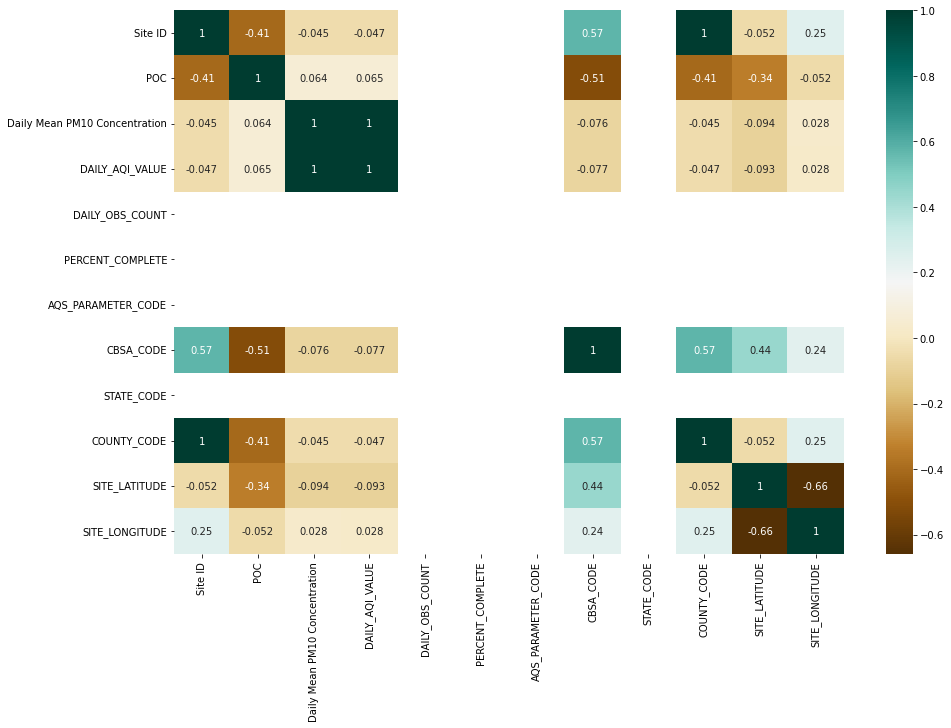

In [ ]:
plt.figure(figsize=(15,10))
c= df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

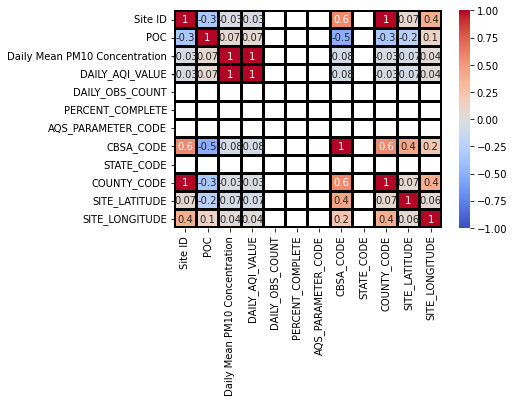

In [ ]:
sns.heatmap(df.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=2, linecolor='black')

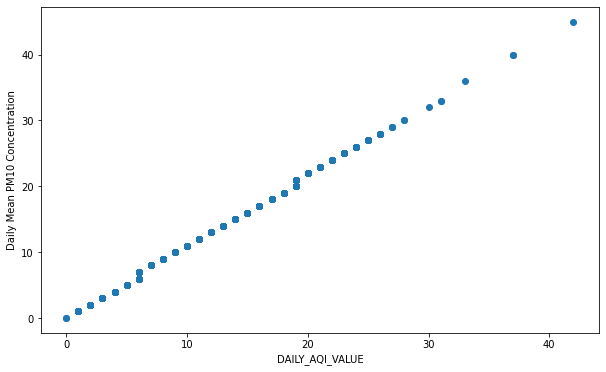

In [ ]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['DAILY_AQI_VALUE'], df['Daily Mean PM10 Concentration'])
ax.set_xlabel('DAILY_AQI_VALUE')
ax.set_ylabel('Daily Mean PM10 Concentration')
plt.show()